In [106]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split

In [15]:
df = pd.read_csv("Z:/tumor.csv")
del df['Sample code number']

In [16]:
df.head()

,Clump Thickness,Uniformity of Cell Size,Uniformity of Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Bland Chromatin,Normal Nucleoli,Mitoses,Class
0,5,1,1,1,2,1,3,1,1,2
1,5,4,4,5,7,10,3,2,1,2
2,3,1,1,1,2,2,3,1,1,2
3,6,8,8,1,3,4,3,7,1,2
4,4,1,1,3,2,1,3,1,1,2


In [18]:
features = df.columns[:-1]

In [27]:
df.corr()

,Clump Thickness,Uniformity of Cell Size,Uniformity of Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Bland Chromatin,Normal Nucleoli,Mitoses,Class
Clump Thickness,1.000000,0.642481,0.653470,0.487829,0.523596,0.593091,0.553742,0.534066,0.350957,0.714790
Uniformity of Cell Size,0.642481,1.000000,0.907228,0.706977,0.753544,0.691709,0.755559,0.719346,0.460755,0.820801
Uniformity of Cell Shape,0.653470,0.907228,1.000000,0.685948,0.722462,0.713878,0.735344,0.717963,0.441258,0.821891
Marginal Adhesion,0.487829,0.706977,0.685948,1.000000,0.594548,0.670648,0.668567,0.603121,0.418898,0.706294
Single Epithelial Cell Size,0.523596,0.753544,0.722462,0.594548,1.000000,0.585716,0.618128,0.628926,0.480583,0.690958
Bare Nuclei,0.593091,0.691709,0.713878,0.670648,0.585716,1.000000,0.680615,0.584280,0.339210,0.822696
Bland Chromatin,0.553742,0.755559,0.735344,0.668567,0.618128,0.680615,1.000000,0.665602,0.346011,0.758228
Normal Nucleoli,0.534066,0.719346,0.717963,0.603121,0.628926,0.584280,0.665602,1.000000,0.433757,0.718677
Mitoses,0.350957,0.460755,0.441258,0.418898,0.480583,0.339210,0.346011,0.433757,1.000000,0.423448
Class,0.714790,0.820801,0.821891,0.706294,0.690958,0.822696,0.758228,0.718677,0.423448,1.000000


In [31]:
def remove_multicollinearity(features):
    final_features = list(features)
    
    CR = df[features].corr().values
    
    for i in range(len(features)):
        for j in range(i+1,len(features)):
            
            if(CR[i][j]>=0.7 and features[i] in final_features):
                
                final_features.remove(features[i])
    
    return final_features

In [33]:
final_features = remove_multicollinearity(features)

['Clump Thickness', 'Marginal Adhesion', 'Single Epithelial Cell Size', 'Bare Nuclei', 'Bland Chromatin', 'Normal Nucleoli', 'Mitoses']


In [36]:
X = df[final_features]

In [117]:
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score,precision_score,confusion_matrix,recall_score

le = LabelEncoder()

df['Class'] = le.fit_transform(df['Class'])

Y = df['Class']

In [41]:
X.head()

,Clump Thickness,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Bland Chromatin,Normal Nucleoli,Mitoses
0,5,1,2,1,3,1,1
1,5,5,7,10,3,2,1
2,3,1,2,2,3,1,1
3,6,1,3,4,3,7,1
4,4,3,2,1,3,1,1


In [62]:
def sigmoid(x):
    return 1/(1+np.exp(-x))

In [126]:
def logistic_regression(X,Y,eta):
    W = np.random.rand(X.shape[1]+1)
    epochs = 0
    Wnew = np.random.rand(X.shape[1])
    convergence = False
    y_cap = [None]*len(Y)
    
    while(not convergence):
        
        for i in range(len(X)):
            wTx = W.dot(np.insert(X[i],0,1))
            
            ySig = sigmoid(wTx)
            
            if(ySig>=0.5):
                y_cap[i] = 1
            elif(ySig<0.5):
                y_cap[i] = 0
                
            if(y_cap[i]!=Y[i]):
                Wnew = W +eta*(ySig)*(1-ySig)*(Y[i]-ySig)*np.insert(X[i],0,1)
            
            W = Wnew
        
        epochs += 1
        
        if(epochs==3000):
            convergence = True
    
    return W

In [80]:
def model_testing(X,Y,W):
    
    y_cap = [None]*len(Y)
    
    for i in range(len(X)):
        wTx = W.dot(np.insert(X[i],0,1))
        
        ySig = sigmoid(wTx)
        
        if(ySig>=0.5):
                y_cap[i] = 1
        elif(ySig<0.5):
                y_cap[i] = 0
                
    return y_cap

In [145]:
def logisticMetrics(y,y_cap):
    CF = confusion_matrix(y,y_cap)
    
    print(CF)
    
    TP = CF[0][0]
    FP = CF[1][0]
    FN = CF[0][1]
    TN = CF[1][1]
    
    print(f"Accuracy :  {(TP+TN)/(TP+FP+TN+FN)}")
    print(f"Precision : {TP/(TP+FN)}")
    
    return [TP/(TP+FP),FP/(FP+TN)]

In [51]:
X_train,X_test,Y_train,Y_test = train_test_split(X.to_numpy(),Y.to_numpy(),test_size=0.33,random_state=2)

In [127]:
weights = [None]*5

weights[0] = logistic_regression(X_train,Y_train,0.01)
weights[1] = logistic_regression(X_train,Y_train,0.03)
weights[2] = logistic_regression(X_train,Y_train,0.05)
weights[3] = logistic_regression(X_train,Y_train,0.07)
weights[4] = logistic_regression(X_train,Y_train,0.09)

In [128]:
weights[0]

array([-5.46042436e-01,  5.51957671e-02,  3.03220905e-02, -3.19919663e-04,
        3.92559899e-02,  2.41925947e-02,  1.80390668e-02,  2.32565699e-03])

In [157]:
TPR = []
FPR = []

for i in range(5):
    Y_pred = model_testing(X_test,Y_test,weights[i])
    tup = logisticMetrics(Y_test,Y_pred)
    TPR.append(tup[0])
    FPR.append(tup[1])

[[127  11]
 [  0  88]]
Accuracy :  0.9513274336283186
Precision : 0.9202898550724637
[[128  10]
 [  1  87]]
Accuracy :  0.9513274336283186
Precision : 0.927536231884058
[[127  11]
 [  1  87]]
Accuracy :  0.9469026548672567
Precision : 0.9202898550724637
[[127  11]
 [  0  88]]
Accuracy :  0.9513274336283186
Precision : 0.9202898550724637
[[128  10]
 [  0  88]]
Accuracy :  0.9557522123893806
Precision : 0.927536231884058


In [159]:
print(f"True positive rates : {TPR}")
print(f"False positive rates : {FPR}")

True positive rates : [1.0, 0.9922480620155039, 0.9921875, 1.0, 1.0]
False positive rates : [0.0, 0.011363636363636364, 0.011363636363636364, 0.0, 0.0]


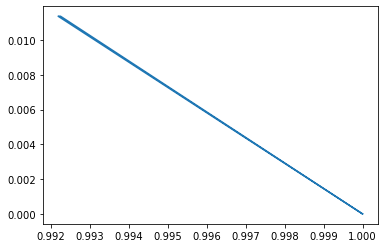

Area under ROC curve  : 3.4410236081708345e-07


In [148]:
import matplotlib.pyplot as plt

plt.plot(TPR,FPR)
plt.show()
print(f"Area under ROC curve  : {np.trapz(TPR,FPR)}")

In [122]:
logisticMetrics(Y_test,Y_pred)

[[124  14]
 [  0  88]]


1.0

In [109]:
print(f"Accuracy of the logistic regression model : {acc*100}")

Accuracy of the logistic regression model : 93.80530973451327


In [99]:
from sklearn.svm import SVC

In [149]:
clf1 = SVC(kernel="linear")
clf2 = SVC(kernel="sigmoid")
clf3 = SVC(kernel="polynomial")
clf4 = SVC(kernel="gaussian")

In [96]:
clf1 = clf.fit(X_train,Y_train)
clf2 = clf.fit(X_train,Y_train)
clf3 = clf.fit(X_train,Y_train)
clf4 = clf.fit(X_train,Y_train)

In [151]:
Y_pred_svc = clf.predict(X_test)
Y_pred_sig = clf.predict(X_test)
Y_pred_poly = clf.predict(X_test)
Y_pred_g = clf.predict(X_test)

In [152]:
print(f"Accuracy of SVC (linear) : {accuracy_score(Y_test,Y_pred_svc)*100}")
print(f"Accuracy of SVC (sigmoid) : {accuracy_score(Y_test,Y_pred_sig)*100}")
print(f"Accuracy of SVC (polynomial) : {accuracy_score(Y_test,Y_pred_poly)*100}")
print(f"Accuracy of SVC (gaussian) : {accuracy_score(Y_test,Y_pred_g)*100}")

Accuracy of SVC (linear) : 95.57522123893806
Accuracy of SVC (sigmoid) : 95.57522123893806
Accuracy of SVC (polynomial) : 95.57522123893806
Accuracy of SVC (gaussian) : 95.57522123893806


In [153]:
print(f"Accuracy of SVC (linear) : {accuracy_score(Y_test,Y_pred_svc)*100}")
print(f"Accuracy of SVC (sigmoid) : {accuracy_score(Y_test,Y_pred_sig)*100}")
print(f"Accuracy of SVC (polynomial) : {accuracy_score(Y_test,Y_pred_poly)*100}")
print(f"Accuracy of SVC (gaussian) : {accuracy_score(Y_test,Y_pred_g)*100}")

Accuracy of SVC (linear) : 95.57522123893806
Accuracy of SVC (sigmoid) : 95.57522123893806
Accuracy of SVC (polynomial) : 95.57522123893806
Accuracy of SVC (gaussian) : 95.57522123893806


In [154]:
print(f"Consusion Matrix of SVC (linear) : \n{confusion_matrix(Y_test,Y_pred_svc)}")
print(f"Consusion Matrix of SVC (sigmoid) : \n{confusion_matrix(Y_test,Y_pred_sig)}")
print(f"Consusion Matrix of SVC (polynomial) : \n{confusion_matrix(Y_test,Y_pred_poly)}")
print(f"Consusion Matrix of SVC (gaussian) : \n{confusion_matrix(Y_test,Y_pred_g)}")

Consusion Matrix of SVC (linear) : 
[[131   7]
 [  3  85]]
Consusion Matrix of SVC (sigmoid) : 
[[131   7]
 [  3  85]]
Consusion Matrix of SVC (polynomial) : 
[[131   7]
 [  3  85]]
Consusion Matrix of SVC (gaussian) : 
[[131   7]
 [  3  85]]
